### Stochastic Optimal Control with Applications to Market Making

We review the fundamentals of the theory of stochastic optimal control and its application to market making in limit order books. 

The usual setup is to work with controlled diffusion processes of the form, 

$$
dX_s = b(X_s, \alpha_s)ds + \sigma(X_s, \alpha_s)dW_s
$$

#### Merton's Problem

For example, in the classic Merton's Problem, we have the following, 

 - A stock price $S_t$ which follows : $dS_t = \mu S_t dt + \sigma S_t dW_t$.
 - An agent trades in the stock and cash, holding $H_t$ shares of the stock at time $t$.
 - The cash in the portfolio is $X_t - H_tS_t$.
 - The wealth process $X_t$ has the dynamics, 
 
   $$
   \begin{align}
   dX_t &= H_t dS_t + r\left(X_t - H_tS_t\right) dt \\
   &= H_t\left(\mu S_t dt + \sigma S_t dW_t\right)+ r\left(X_t - H_tS_t\right) dt\\
   &= rX_t dt +H_t \left[ (\mu-r) S_t dt + \sigma S_t dW_t\right]\\
   &= rX_t dt +H_t S_t\left[ (\mu-r) dt + \sigma dW_t\right]\\
   &= rX_t dt +\underbrace{H_t S_t}_{\pi_t} \sigma\left[ \underbrace{\frac{(\mu-r)}{\sigma}}_{\lambda} dt +
   dW_t\right]\\
   &= rX_t dt +\pi_t \sigma\left[ \lambda dt + dW_t\right]
   \end{align}
   $$
   
   where in the above, $\pi_t$ is the control and $\lambda$ is the market price of risk for the stock.
 - The finite horizon problem is posed as having the agent maximise his expected utility of terminal wealth over the horizon $\left[0,T\right]$. The value function for the agent is, 
 
   $$
   u(x):= \underbrace{\sup}_{\pi \in \mathcal{A}(x)} \mathbb{E}\left[\left.U(X_T)\right| X_0 = x\right]
   $$
   
   where $x$ is the initial wealth and $U(\cdot)$ is some utility function.

#### The General Setup

In general, the value function is of the form, 

$$
u(x):= \sup_{\pi \in \mathcal{A}(x)} \mathbb{E}\left[\left.\int_0^T f(s, X_s, \pi_s)ds + F(X_T) 
\right|X_0=x\right]
$$

Why is the value function defined as such? 

 1. We can think of $F(\cdot)$ as quantifying the value of the terminal wealth $X_T$. 
 2. For $f(\cdot, \cdot, \cdot)$, we can think of it as quantifying the "instantaneous" utility at every time instance, and the "full reward" for carrying out our strategy is obtained by integrating $f(\cdot, \cdot, \cdot)$ from $0$ to $T$. 
 3. Of course, since $X_T$ is a stochastic quantity, naturally we would take expectations.
 4. Finally, we take the supremum (over the set of admissible strategies) of the expectation.
 
For example, in Merton's Utility from Terminal Wealth and Intermediate Consumption Problem, the value function is, 

$$
u(x):= \sup_{(\pi, c) \in \mathcal{A}(x)} \mathbb{E}\left[\left.\int_0^T e^{-\delta t}U_1(c_t) ds + U_2(X_T) 
\right|X_0=x\right]
$$

where $c_t$ is consumption at time $t$ and $U_1, U_2$ are utility functions. 

So what the above intuitively says is that, we want to chose optimal controls $(\pi, c)$ to maximize the expected utility of, 

 1. Our sum of utility from consumption across time from $0$ to $t$, given by $\int_0^T e^{-\delta t}U_1(c_t) ds$.
 2. Our utility of terminal wealth $X_T$, given by $U_2(X_T)$.

#### Dynamic Programming and the Hamilton-Jacobi-Bellman Equation

We now explore how to go about solving control problems such as the above using the dynamic programming formulation and explore its link to HJB equations.

As usual, we work with controlled diffusions of the form, 

$$
dX_s = b(X_s, \alpha_s)ds + \sigma(X_s, \alpha_s)dW_s
$$

And we're interested in the **finite horizon problem**, 

$$
u(x):= \sup_{\alpha \in \mathcal{A}(x)} \mathbb{E}\left[\left.\int_0^T f(s, X_s, \alpha_s)ds + F(X_T) 
\right|X_0=x\right]
$$

where $T \in (0, \infty)$, $\mathcal{A}(x)$ is the set of admissible controls, given $X_0=x$.

The dynamic programming formulation tackles the problem by considering a starting state $(t, x)$, and let  $\mathcal{A}(t,x)$ be the set of admissible controls with this starting state.

A new notation is also introduced where we will write $\left(X_s^{t, x}\right)_{s\in (t,T)}$ to denote a path of the controlled diffusion starting at $X_t=x$.

To cater to different starting points, we define an objective functional, 

$$
J(t, x;\alpha) := \mathbb{E}\left[\left.\int_t^T f(s, X_s^{t,x}, \alpha_s)ds + F(X_T^{t,x}) 
\right|X_t=x\right]
$$

The objective functional states that, if we start from time $t$, with initial value of $X_t=x$, and apply the control $\alpha$ (any arbitrary control), the expectation of the terminal reward $F(X_T^{t,x})$ and the ongoing sum of rewards $\int_t^T f(s, X_s^{t,x}, \alpha_s)ds$, is defined as $J(t, x;\alpha)$.

With that we can write the value function starting at time $t$ as,

$$
u(t, x) := \sup_{\alpha \in \mathcal{A}(t,x)} J(t, x;\alpha)
$$

and using this notation, we can write the original value function starting at $t=0$ as, 

$$
u(x) \equiv u(0,x)
$$

So far, we have only been introducing additional notation to facilitate the formulation of the problem as a dynamic programming problem.

#### The Dynamic Programming Principle

In this section we introduce the dynamic programming principle, which will lead us to the HJB equation involving a PDE on $u(t,x)$. Solving the PDE and maximising it over the space of admissible controls would give us the optimal control to use.

The dynamic programming principle starts of with comparing two strategies, 

 - $\mathbf{I}$ : Using the optimal control $(\hat{\alpha}_s)_{s\in[t, T]}$ over the interval $[t,T]$, versus :
 - $\mathbf{II}$ : Using an arbitrary control $(\alpha_s)_{s\in[t, t+h)}$ over the interval $[t,t+h]$ (where $h$ is a small time interval), and then using the optimal control $(\hat{\alpha}_s)_{s\in[t+h, T]}$.
 
With the above formulation, it is immediately obvious that strategy $\mathbf{I}$ is at least as good (since $\hat{\alpha}_s$ is the optimal control over the whole period) as strategy $\mathbf{II}$. 

Given this, we can write, 

$$
u(t,x) \ge \mathbb{E}\left[\underbrace{\int_t^{t+h} f(s, X_s^{t,x}, \alpha_s)ds}_{\text{running reward from $t$ to $t+h$}} + \underbrace{u(t+h, X_{t+h}^{t,x})}_{\text{the optimal value from $t+h$ to $T$}}
\right]
$$

Note that in the above, the inequality results from the term $\mathbb{E}\left[\int_t^{t+h} f(s, X_s^{t,x}, \alpha_s)ds\right]$, due to the fact that it is using an **arbitrary** control $\alpha_s$.

To get equality, we need to maximize the RHS over the space of controls. This means we must write, 

$$
u(t,x) = \sup_{(\alpha_x)_{s\in[t,t+h)}} \mathbb{E}\left[\underbrace{\int_t^{t+h} f(s, X_s^{t,x}, \alpha_s)ds}_{\text{running reward from $t$ to $t+h$}} + \underbrace{u(t+h, X_{t+h}^{t,x})}_{\text{the optimal value from $t+h$ to $T$}}
\right]
$$

In the next step, we apply Ito on $u(t, x)$, 

$$
\begin{aligned}
du &= u_t dt + u_x dX_t + \frac{1}{2} u_{xx} d\langle X\rangle_t\\
&= u_t dt + u_x \left[b(X_t, \alpha_t)dt + \sigma(X_t, \alpha_t)dW_t\right] + \frac{1}{2} u_{xx} \sigma^2(X_t, \alpha_t)dt \\
&=u_t dt +  b(X_t, \alpha_t)u_x dt + \frac{1}{2} \sigma^2(X_t, \alpha_t)  u_{xx} dt +  \sigma(X_t, \alpha_t)u_xdW_t
\end{aligned}
$$

In integral form, we can also write, 

$$
\begin{aligned}
u(t+h, X_{t+h}^{t,x}) &= u(t, x) + \int_t^{t+h} \frac{\partial u}{\partial t}(s, X_s^{t,x}) + \underbrace{b(X_s, \alpha_s)\frac{\partial u}{\partial x}(s, X_s^{t,x}) + \frac{1}{2} \sigma^2(X_s, \alpha_s) \frac{\partial^2 u}{\partial x^2}(s, X_s^{t,x})}_{\text{this is termed } \mathcal{L}^\alpha(\cdot) \text{, the generator of diffusion}} ds + \int_t^{t+h} \sigma(X_s, \alpha_s)\frac{\partial u}{\partial x}(X_s, \alpha_s)dW_s\\
&=  u(t, x) +\int_t^{t+h}\left( \frac{\partial u}{\partial t} + \mathcal{L}^\alpha u\right )\left(s, X_s^{t,x}\right)ds+ \int_t^{t+h} \sigma(X_s, \alpha_s)\frac{\partial u}{\partial x}(X_s, \alpha_s)dW_s
\end{aligned}
$$

If we substitute $u(t+h, X_{t+h}^{t,x})$ into the inequality involving $u(t,x)$, the stochastic integral would disappear under the expectation operator, and we get, 

$$
\begin{aligned}
&u(t,x) \ge \mathbb{E}\left[\int_t^{t+h} f(s, X_s^{t,x}, \alpha_s)ds + u(t, x) +\int_t^{t+h}\left( \frac{\partial u}{\partial t} + \mathcal{L}^\alpha u\right )\left(s, X_s^{t,x}\right)ds\right]\\
\Rightarrow &\mathbb{E}\left[\int_t^{t+h} f(s, X_s^{t,x}, \alpha_s)ds +\left( \frac{\partial u}{\partial t} + \mathcal{L}^\alpha u\right )\left(s, X_s^{t,x}\right)ds\right]\le 0
\end{aligned}
$$

Now we divide by $h$, move it within the expectation, and let $h$ tends to zero. This gives us, 

$$
\begin{aligned}
f(t, x, \alpha) + \left( \frac{\partial u}{\partial t} + \mathcal{L}^\alpha u\right ) \left(t, x\right) &\le 0\\
\Rightarrow \frac{\partial u}{\partial t} +  \mathcal{L}^\alpha u(t, x)+f(t, x, \alpha) &\le 0 
\end{aligned}
$$

This inequality result is for any **arbitrary** control $\alpha$.


#### The Hamilton-Jacobi-Bellman Equation
To get equality, we must have the optimal $\alpha$, with which we can write the **HJB Equation**, 

$$
\frac{\partial u}{\partial t} + \sup_{\alpha \in \mathcal{A}}\left[ \mathcal{L}^\alpha u(t, x)+f(t, x, \alpha)\right] = 0 
$$

In other words, for the optimal $\alpha=\hat{\alpha}$, we have, 

$$
\frac{\partial u}{\partial t} + \mathcal{L}^\hat{\alpha} u(t, x)+f(t, x, \hat{\alpha}) = 0 
$$

#### Stochastic Control for Counting Process

So far we've worked with diffusions as the driving source of uncertainty in the control problem. In market-making, where-by participants post limit-orders and market-orders, it is also important to incorporate counting process for driving uncertainty in the model.

We will provide a quick introduction to Poisson Counting Processes and see how they fit in to the same dynamic programming framework as we have described above.

##### The Poisson Process

A Poisson process is the continuous time analogue of the Bernoulli process with the following properties, 
 - it is subject to jumps of fixed (or possibly random) size.
 - its mean arrival rate over an interval $dt$ is $\lambda$. Specifically, we define the probability of $k$ arrivals in time $dt$ as
 
$$
   P(k, dt)=\begin{cases}
           1-\lambda dt, \quad\text{if $k=0$}\\
           \lambda dt, \,\,\,\qquad\text{if $k=1$} \\
           0, \,\quad\qquad\text{if $k>1$} 
        \end{cases}
$$
   
   and note that in the above, we mean the above holds in the limit as $dt$ goes to zero. The "arrival rate" $\lambda$ is the expected number of arrivals per unit time.
   
   Using the above assumption, we consider the probability that there are $k$ arrivals in time interval $t+\Delta t$, denoted by $P(k, t+dt)$. By the law of total probability, we must have the following relation, 
   
   $$
   \begin{aligned}
   P(k, t+dt) &= \underbrace{P(k, t) }_{\text{$k$ arrivals in time $t$}}\times \underbrace{P(0, dt)}_{\text{0 arrivals in time $dt$}} + \underbrace{P(k-1, t)}_{\text{$k-1$ arrivals in time $t$}} \times \underbrace{P(1, dt)}_{\text{1 arrival in time $dt$}}\\
   &= P(k, t) \times (1-\lambda dt) + P(k-1, t) \times \lambda dt
   \end{aligned}
   $$

The next step is to manipulate the above expression into a differential equation. 

We begin by re-arranging terms, 

$$
\begin{aligned}
P(k, t+dt) &= P(k, t) \times (1-\lambda dt) + P(k-1, t) \times \lambda dt\\
P(k, t+dt) &= P(k, t) - P(k, t) \lambda dt+ P(k-1, t) \lambda dt\\
P(k, t+dt) - P(k,t) &= \lambda \left[P(k-1, t) - P(k, t)\right] dt\\
\end{aligned}
$$

From the above, if we go to the limit as $dt$ tends to zero, 

$$
\begin{aligned}
\frac{\partial P(k, t)}{\partial t} &= \lim_{dt \rightarrow 0} \frac{P(k, t+dt) - P(k,t) }{dt}\\
&= \lambda \left[P(k-1, t) - P(k, t)\right]
\end{aligned}
$$

We now show that the following function satisfy the above differential equation, 

$$
P(k, t) = e^{-\lambda t}\frac{(\lambda t)^k}{k!}
$$



Differentiating wrt $t$ gives, 

$$
\begin{aligned}
\frac{\partial P(k, t)}{\partial t} &= e^{-\lambda t} \frac{\lambda k(\lambda t)^{k-1}}{k!} -\lambda e^{-\lambda t}\frac{(\lambda t)^k}{k!}\\
&= \lambda \left[ e^{-\lambda t} \frac{ k(\lambda t)^{k-1}}{k!} - e^{-\lambda t}\frac{(\lambda t)^k}{k!}\right]\\
&= \lambda \left[ e^{-\lambda t} \frac{ (\lambda t)^{k-1}}{k-1!} - e^{-\lambda t}\frac{(\lambda t)^k}{k!}\right]\\
&= \lambda [P(k-1, t)-P(k,t)]
\end{aligned}
$$

which is as desired.

##### The Poisson Counting Process

The simplest Poisson Process is that with a jump size of 1, which is termed the Poisson Counting Process. 

It is defined as $(N_t)_{t\ge0}$ with, 

 - $N_t \ge0$
 - $N_t$ is an integer
 - if $ s\le t$ then $N_s \le N_t$
 - $\mathbb{P}(N_t = n) = e^{-\lambda t} \frac{(\lambda t)^n}{n!}$, i.e. the probability that $N_t$ is equal to $n$ is given by the Poisson pdf we derived earlier.
 - $\mathbb{E}[N_t] = \lambda t$ and $\mathbb{Var}[N_t] = \lambda t$ (this is standard result from Poisson distribution).
 - Importantly, it also has **stationary independent increments**, i.e. for $ 0\le s\le t$, the following holds,
 
   $\mathbb{P}(N_{t+h} -N_{s+h} = k) = \mathbb{P}(N_t - N_s = k) = e^{-\lambda (t-s)}\frac{(\lambda( t-s))^k}{k!}$ for all $h > 0$.
 - Another useful result is that $N_t - \lambda t$  is a martingale. 
 
 This is very important because remember in the derivation of the HJB equation, we need to make the stochastic integral wrt to the Wiener Process disappear under the expectation operator. We would need to same for the derivation later on involving the Counting Process.
   
 
Since we often need to work with SDEs of stock price involving jump diffusions like the below, 

$$
\frac{dS_t}{S_t} = \mu dt + \sigma dW_t - \delta dN_t 
$$

we need to now define what is meant by $dN_t$. 

Recall that, roughly speaking, the probability of one count in an interval of amplitude $dt$ is of order $dt$ (given by $\lambda dt$ earlier), while the probability of more than one count is of higher order. We can translate this into the rule, 

   $$
   \begin{aligned}
       dN_t&=\begin{cases}
               1, \quad\text{if there is a jump in the time interval $(t, t+dt]$},\\
               0, \quad\text{otherwise},\\
            \end{cases}\\
       &d\langle N\rangle_t = dN_t, \qquad dN_t dt = 0
   \end{aligned}
   $$


##### Ito's Lemma for Jumps

   
We also need Ito's lemma to work with jumps, and it is but a straight forward extension of the usual Ito's lemma with the addition work of adding back the all the jumps which occured in between the limits of integration.

Recall that for a continuous process $dX_s = b(X_s, \alpha_s)ds + \sigma(X_s, \alpha_s)dW_s$, Ito's lemma is as follows, 

$$
\begin{aligned}
df(X_t) &=  f_x dX_t + \frac{1}{2}f_{xx} d\langle X\rangle _t\\
&=  f_x \left[b(\cdot) dt + \sigma(\cdot) dW_t\right] + \frac{1}{2}f_{xx} \sigma^2(\cdot) dt
\end{aligned}
$$

In integral form, we have, 

$$
\begin{aligned}
X_t &= X_0 + \int_0^t f_x b(\cdot) ds + \int_0^t f_x \sigma(\cdot) dW_s + \frac{1}{2}\int_0^t f_{xx} \sigma^2(\cdot) ds
\end{aligned}
$$

Since conceptually, the integral is a sum, and if we add jumps at finite number of points to the process $X_t$, what we need to extend Ito's lemma is simply to just add back the jumps. 

Assume to following notation, 

$$
N_s = N_{s^-} + 1 \quad \text{if} \quad dN_s=1
$$

Then the extended Ito's lemma is, 


$$
\begin{aligned}
X_t &= X_0 + \int_0^t f_x b(\cdot) ds + \int_0^t f_x \sigma(\cdot) dW_s + \frac{1}{2}\int_0^t f_{xx} \sigma^2(\cdot) ds + \sum_{0\le s\le t} \left[f\left(X_s\right)-f\left(X_{s^-}\right)\right]\\
&= X_0 + \int_0^t f_x b(\cdot) ds + \int_0^t f_x \sigma(\cdot) dW_s + \frac{1}{2}\int_0^t f_{xx} \sigma^2(\cdot) ds + \int_0^t f\left(X_s\right)-f\left(X_{s^-}\right) dN_s
\end{aligned}
$$

Therefore, the differential form of Ito's lemma is, 

$$
\begin{aligned}
df(X_t) &=  f_x dX_t + \frac{1}{2}f_{xx} d\langle X\rangle _t + \left[f\left(X_s\right)-f\left(X_{s^-}\right) \right]dN_s\\
\end{aligned}
$$


**Note** : The reason for all the above hard work on Ito's lemma for Counting Process is so that we can approach the problem of market making using HJB equations with jumps. For example, one of the simplest way to model the arrival of market orders is to use counting processes associated with the number of market orders up to time $t$.

##### HJB Formulation for Counting Processes

For the counting process we defined earlier, the assumption was that the intensity, or "arrival rate", is a constant $\lambda$. In actual fact, we can make $\lambda$ a function of time as well, using $\lambda(t)$, 

$$
   P(k, dt)=\begin{cases}
           1-\lambda(t) dt, \quad\text{if $k=0$}\\
           \lambda(t) dt, \,\,\,\qquad\text{if $k=1$} \\
           0, \,\quad\qquad\text{if $k>1$} 
        \end{cases}
$$

and it can be shown using similar approach as previous that we must have the differential equation, 

$$
\begin{aligned}
\frac{\partial P(k, t)}{\partial t} &= \lambda(t) \left[P(k-1, t) - P(k, t)\right]
\end{aligned}
$$

and that the solution is, 

$$
P(k, t) = \exp{\left(-\int_0^t \lambda(u) du\right)}\frac{\left(-\int_0^t \lambda(u) du\right)^k}{k!}
$$

If $N_t$ is the counting process with the time-dependent intensity $\lambda(t)$, then it is standard result that $M_t = N_t - \int_0^t \lambda(u) du$ is a martingale.

The above result also generalizes to, 

 - the case when the intensity is a stochastic process $\lambda_t$ as well as, 
 - the case when it is a controlled stochastic process $\lambda_t^u = \lambda(t, N_t^u, u)$, where $u$ is the control.

To begin the HJB formulation, we consider again the familiar setup with, 
 - $(N_t^u)_{0\le t\le T}$ a controlled doubly stochastic Poisson process starting at $N_{0^-}=n$.
 - $N_t^u$ has intensity $\lambda_t^u = \lambda(t, N_t^u, u_t)$ where $u_t$ is the control.
 
The value function is, 

$$
H(n):= \sup_{u \in \mathcal{A}} \mathbb{E}\left[\int_0^T F(s, N_s^u, u_s)ds + G(N_T^u) \right]
$$

If $u$ is an **arbitrary** control, the **performance criteria** is, 

$$
H^u(n):= \mathbb{E}\left[\int_0^T F(s, N_s^u, u_s)ds + G(N_T^u) \right]
$$

and the agent seeks to maximise this performance criteria, i.e.,

$$
H(n) =  \sup_{u \in \mathcal{A}} H^u(n)
$$

Next we again introduce the time-indexed notation to facilitate the resolution of the problem using the dynamic programming approach. 

We define,

$$
H(t, n) = \sup_{u \in \mathcal{A}} H^u(t, n)
$$

with

$$
H^u(t, n) = \mathbb{E}_{t, n}\left[\int_t^T F(s, N_s^u, u_s)ds + G(N_T^u) \right]
$$

where $ \mathbb{E}_{t, n}[\cdot]$ represents expectation conditional on $N_t=n$, and $u$ is an arbitrary control when we refer to $H^u(t, n)$.

##### The Martingale Optimality Principle

We take a slightly easier route to the derivation of the HJB equation this time round by using the martingale optimality principle.

Consider the process, 

$$
\left(\underbrace{\int_0^t F(s, N_s^u, u_s)ds}_{\text{using arbitrary control $u$ up to time $t$}} + \underbrace{H(t,N_t)}_{\text{using the optimal control from time $t$ onwards}}\right)_{t\in [0,T]}
$$

The martingale optimality principle says that the above process is a super-martingale for an **arbitrary** control $u$, and it is a martingale for the optimal control $\hat{u}$.

More formally, let $(R_t)_{t\in[0,t]}$ be defined as, 

$$
R_t = \int_0^t F(s, N_s^u, u_s)ds + H(t,N_t)
$$

By definition, $R_0 = H(0, n)$, which is our original objective $H(0, n)=\sup_{u \in \mathcal{A}} H^u(0, n)$ (see definitions above).

Now let us examine $R_T$, which is, 

$$
R_T = \int_0^T F(s, N_s^u, u_s)ds + G(N_T^u)
$$

We can then write the following inequality, 

$$
\underbrace{R_0 = H(0, n)}_{\text{the optimal value function using optimal control $\hat{u}$}} \ge \underbrace{\mathbb{E}[R_T] = \mathbb{E}\left[\int_0^T F(s, N_s^u, u_s)ds + G(N_T^u)\right]}_{\text{the value function using arbitrary control $u$}}
$$

What the above says is that $R_0 \ge \mathbb{E}[R_T]$, meaning $R_t$ is a **super-martingale**.

Equality in the above is achieved when we use the optimal control $\hat{u}$, in which case $R_t$ is a martingale, i.e., $R_0 =\mathbb{E}[R_T]$.

The dynamics of $R_t$ would provide a clue on when $R_t$ would be a martingale. By Ito, 

$$
dR_t = F(t, N_t^u, u_t)dt + dH(t, N_t)
$$



Using Ito's lemma on $H(t, n)$, we have, 

$$
dH(t, n) = H_t dt + \left[H\left(t, n+1\right)-H\left(t, n\right) \right]dN_t
$$

Continuing, we have, 

$$
dR_t = F(t, N_t^u, u_t)dt + H_t dt + \left[H\left(t, n+1\right)-H\left(t, n\right) \right]dN_t
$$

$dN_t$ in the above is not a martingale, which is problematic. But recall the standard result that $M_t = N_t - \int_0^t \lambda(u) du$ is a martingale. This implies that, 

$$
dM_t = dN_t -\lambda(t) dt
$$

So again continuing, 

$$
\begin{aligned}
dR_t &= F(t, N_t^u, u_t)dt + H_t dt + \left[H\left(t, n+1\right)-H\left(t, n\right) \right][dM_t + \lambda(t) dt]\\
&=F(t, N_t^u, u_t)dt + H_t dt + \lambda(t)\left[H\left(t, n+1\right)-H\left(t, n\right) \right] dt + \underbrace{\left[H\left(t, n+1\right)-H\left(t, n\right) \right]dM_t}_{\text{local martingale}}
\end{aligned}
$$

This implies that if we take expectations, the local martingale term disappears and we get, 

$$
\begin{aligned}
\mathbb{E}[dR_t] &= F(t, N_t^u, u_t)dt + H_t dt + \lambda(t)\left[H\left(t, n+1\right)-H\left(t, n\right) \right] dt \\
&= [F(t, N_t^u, u_t)+H_t + \lambda(t)\left[H\left(t, n+1\right)-H\left(t, n\right) \right] dt
\end{aligned}
$$

For $R_t$ to be a martingale, we need the entire expression in the brackets to disappear, and we must do this by optimizing over the space of controls $u \in \mathcal{A}$.

This leads just to the HJB equation, 

$$
\frac{\partial H}{\partial t}(t, n) + \sup_{u \in \mathcal{A}}\left[F(t, N_t^u, u_t) + \lambda(t)\left[H\left(t, n+1\right)-H\left(t, n\right) \right]\right] = 0
$$

### Application to Market Making

With all the basics in place, we are now ready to formulate the market making problem in terms of an optimal control problem. 

We model how a market maker (MM) maximises terminal wealth by trading in and out of positions using limit orders (LOs). The MM provides liquidity to the limit order book (LOB) by posting buy and sell LOs and the control variable is the depth, which is measured from the midprice, at which these LOs are posted. To formalise the problem, we list the relevant variables that we use throughout this section:

 - $(S_t)_{0\le t\le T}$ is the midprice, with dynamics $S_t = S_0 + \sigma W_t$, where $W_t$ is a standard brownian motion.
 - $(\delta^{\pm}_t)_{0\le t\le T}$ denote the depth at which the agent posts LOs. Sell LOs are posted at $S_t + \delta^+_t$ and buy LOs at $S_t - \delta^-_t$. For each round-trip of buying and selling, we make the spread $\delta^+_t + \delta^-_t$. Our PnL depends on making as many of such round trips as possible, while at the same time managing the risk of inventory.
 - $(M_t^{\pm})_{0\le t\le T}$ denote counting processes corresponding to the arrival of buy $(+)$ and sell $(-)$ market orders (MOs), which arrive at Poisson times with intensity $\lambda^{\pm}$.
 - $(N_t^{\delta, \pm})_{0\le t\le T}$ denote **controlled counting processes** (not Poisson according to Cartea book, but why??) for the agent's filled sell $(+)$ and buy $(-)$ LOs.
 - condition on the arrival of a market order (MO), the posted LOs are filled with probability $e^{-\kappa^\pm \delta^\pm_t}$, with $\kappa^\pm > 0$. This means that the fill rate of LOs is given by $\Lambda_t^{\delta, \pm}=\lambda^\pm e^{-\kappa^\pm \delta^\pm_t}$. Intuitively, $\lambda^\pm$ is the arrival rate, and also the probability of a jump. This is modulated by the probability of being filled when posting at depth $\delta^\pm_t$, $e^{-\kappa^\pm \delta^\pm_t}$, to give $\Lambda_t^{\delta, \pm}$.
 - $(X_t^{\delta})_{0\le t\le T}$ denotes the market maker's cash process, and satisfies the SDE, 
 
   $$
   dX_t^{\delta} = \underbrace{(S_{t^-} + \delta^+_t)\,dN_t^{\delta, +}}_{\text{selling high}} - \underbrace{(S_{t^-} - \delta^-_t)\,dN_t^{\delta, -}}_{\text{buying low}}
   $$
   
 - $(Q_t^{\delta})_{0\le t\le T}$ denote the agent's inventory process, with $Q_t^{\delta} = \underbrace{N_t^{\delta,-}}_{\text{qty bought}} - \underbrace{N_t^{\delta,+}}_{\text{qty sold} }$.   

#### Problem Setup

In this section we assume that the MM seeks the strategy $(\delta^{\pm}_t)_{0\le t\le T}$ that maximises cash at the terminal date $T$. We also assume that at time $T$ the MM liquidates her terminal inventory $Q_T$ using an MO at a price which is worse than the midprice to account for liquidity taking fees as well as the MO walking the LOB. Finally, the MM caps her inventory so that it is bounded above by $\bar{q}$ > 0 and below by $\underline{q}$ < 0, both finite, and also includes a running inventory penalty so that the **performance criterion** is, 

$$
H^\delta(t,x,S,q) = \mathbb{E}_{t,x,q,S}\left[\underbrace{X_T}_{\text{terminal cash}} + \underbrace{Q_T^\delta \left(S_T^\delta - \alpha Q_T^\delta  \right)}_{\text{liquidate inventory with penalty at time $T$}} - \underbrace{\phi \int_t^T \left(Q_u\right)^2 du}_{\text{running penalty term for holding inventory}}\right]
$$

In the above where $\alpha \ge 0$ represents the fees for taking liquidity (i.e. using an MO) as well as the impact of the MO walking the LOB, and $\phi\ge 0$ is the running inventory penalty parameter. The MM’s value function is, 

$$
H(t,x,S,q) = \sup_{\delta^\pm \in \mathcal{A}}H^\delta(t,x,S,q)
$$

As done previously, we use the martingale optimality principle, but this time round, we take addition care to break up the process $R_t$ into its continuous part and the jump part. 

The process $R_t$ is, 

$$
R_t = -\phi \int_0^t Q_u^2\,du + H(t,X_t, S_t, Q_t)
$$

which we break up into the continuous part $R_{t, C}$ (assuming $x$ and $q$ fixed, while $t$ and $S$ vary), 

$$
\require{cancel}
R_{t, C} = -\cancel{\phi \int_0^t Q_u^2\,du} + H_C(t,\cdot, S_t, \cdot)
$$

and the jump part $R_{t, J}$ (assuming $S$ fixed), 

$$
R_{t, J} = -\phi \int_0^t Q_u^2\,du + H_J(t,X_t, \cdot, Q_t)
$$

Using Ito on $R_{t, C}$, 

$$
\begin{aligned}
dR_{t, C} &= H_t dt + H_S dS_t + \frac{1}{2}H_{SS}d\langle S \rangle_t\\
&=H_t dt + H_S \sigma dW_t + \frac{1}{2}H_{SS}\sigma^2 dt\\
\mathbb{E}[dR_{t, C}] &= \left[\underbrace{H_t + \frac{1}{2}H_{SS}\sigma^2}_{\text{we need this to be zero to make $R_t$ a martingale}}\right] dt
\end{aligned}
$$

The variables $x$ and $q$ are related as follows, 

 - if a MO hits the ask-quote of the market maker, $q \mapsto q-1$ and $x \mapsto x + (S+\delta^+)$.
 - if a MO hits the bid-quote of the market maker, $q \mapsto q+1$ and $x \mapsto x - (S-\delta^-)$.

That is to say that $Q_t^\delta$ jumps due to two different scenarios, $dN_t^{\delta, +}$ jumping or $dN_t^{\delta, -}$ jumping.

Using Ito on $R_{t, J}$, 

$$
\begin{aligned}
dR_{t, J} &= -\phi q^2 dt + H_t dt + \left[H(t, x + (S+\delta^+), S, q-1) - H(t, x, S, q)\right] dN_t^{\delta, +}\\
&\quad + \left[H(t, x - (S-\delta^-), S, q+1) - H(t, x, S, q)\right] dN_t^{\delta, -}\\
&=-\phi q^2 dt + H_t dt + \left[H(t, x + (S+\delta^+), S, q-1) - H(t, x, S, q)\right]\left[dM_t^{\delta, +}+ \Lambda_t^{\delta, +}dt\right]\\
&\quad + \left[H(t, x - (S-\delta^-), S, q+1) - H(t, x, S, q)\right]\left[dM_t^{\delta, -}+ \Lambda_t^{\delta, -}dt\right]\\
\mathbb{E}[dR_{t, J}] &= \left[-\phi q^2 + H_t + \lambda^+ e^{-\kappa^+ \delta^+_t}\left[H(t, x + (S+\delta^+), S, q-1) - H(t, x, S, q)\right]\right. \\
&\quad \left.\lambda^- e^{-\kappa^- \delta^-_t}\left[H(t, x - (S-\delta^-), S, q+1) - H(t, x, S, q)\right]\right]dt
\end{aligned}
$$

Combining the continuous and jump parts, and recall that $R_t$ is a martingale for the optimal control, this means we have the HJB equation, 

$$
\begin{aligned}
0 &= H_t + \frac{1}{2}\sigma^2 H_{SS} - \phi q^2 \\
&\quad + \lambda^+ \sup_{\delta^+}\left\{{e^{-\kappa^+ \delta^+_t}\left[H(t, x + (S+\delta^+), S, q-1) - H(t, x, S, q)\right]}\right\}\\
&\quad + \lambda^- \sup_{\delta^-}\left\{{e^{-\kappa^- \delta^-_t}\left[H(t, x - (S-\delta^-), S, q+1) - H(t, x, S, q)\right]}\right\}\\
\end{aligned}
$$

The terminal condition (when $t=T$) is $H(T, x, S, q)= x+q(S-\alpha q)$, since the penalty term vanish.

##### Solving the HJB Equation

Since the terminal condition for $H$ is $H(T, x, S, q)= x+q(S-\alpha q)=x + qS - \alpha q^2$, we use the *ansatz* $H(t, x, S, q)= x+qS+g(t,q)$, with the requirement that $g(T, q)=-\alpha q^2$ so that we recover the terminal condition.

Next we substitute our *ansatz* into the HJB equation, 

$$
\begin{aligned}
0 &= g_t - \phi q^2 \\
&\quad + \lambda^+ \sup_{\delta^+}\left\{{e^{-\kappa^+ \delta^+_t}\left[\delta^+ +g(t, q-1) - g(t, q)\right]}\right\}\\
&\quad + \lambda^- \sup_{\delta^-}\left\{{e^{-\kappa^- \delta^-_t}\left[\delta^- +g(t, q+1) - g(t, q)\right]}\right\}\\
g(T, q) &= -\alpha q^2
\end{aligned}
$$

To find the supremum, we take first order conditions wrt $\delta^+$ and $\delta^-$ and set them to zero, 

$$
\begin{aligned}
\frac{\partial}{\partial \delta^+}\left[e^{-\kappa^+ \delta^+_t}\left[\delta^+ +g(t, q-1) - g(t, q)\right]\right]&=0\\
e^{-\kappa^+ \delta^+_t} - \kappa^+ e^{-\kappa^+ \delta^+_t}\left[\delta^+ +g(t, q-1) - g(t, q)\right]&=0\\
e^{-\kappa^+ \delta^+_t}\left[1-\kappa^+\left[ \delta^+ +g(t, q-1) - g(t, q)\right]\right]&=0\\
\delta^+ = \frac{1}{\kappa^+}- \left[g(t, q-1) - g(t, q)\right]
\end{aligned}
$$

The expression for $\delta^-$ is similar, and we can summarize by, saying that the optimal control  $\delta^{\pm, *}$ is given by, 

$$
\delta^{\pm, *} = \frac{1}{\kappa^\pm}- \left[g(t, q\mp 1) - g(t, q)\right]
$$

Substituting the expression for the optimal control back into the HJB equation gives, 

$$
\begin{aligned}
0 &= g_t - \phi q^2 \\
&\quad + \lambda^+ \left\{{e^{-\kappa^+ (\frac{1}{\kappa^+}- \left[g(t, q- 1) - g(t, q)\right])}\left[\frac{1}{\kappa^+}- \left[g(t, q - 1) - g(t, q)\right] +g(t, q-1) - g(t, q)\right]}\right\}\\
&\quad + \lambda^- \left\{{e^{-\kappa^- (\frac{1}{\kappa^-}- \left[g(t, q+ 1) - g(t, q)\right])}\left[\frac{1}{\kappa^-}- \left[g(t, q+ 1) - g(t, q)\right] +g(t, q+1) - g(t, q)\right]}\right\}\\
&= g_t - \phi q^2 +\frac{\lambda^+}{e \kappa^+}e^{\kappa^+ \left[g(t, q- 1) - g(t, q)\right]}+\frac{\lambda^-}{e \kappa^-}e^{\kappa^- \left[g(t, q+ 1) - g(t, q)\right]}
\end{aligned}
$$

We need to solve for $g(t, q)$ to find the final form of the expression for $\delta^{\pm, *}$.

In general, we need to apply numerical methods for solving the ODE system above. However, for the special case where $\kappa^+=\kappa^-=\kappa$, there is an analytic solution which we will work through below. 

Assume $g(t, q) = \frac{1}{\kappa} \log{\omega(t, q)}$ and $\kappa^+=\kappa^-=\kappa$. Substituting into the ODE gives, 

$$
\begin{aligned}
\frac{1}{\kappa \omega(t, q)} \omega_t(t, q) - \phi q^2+\frac{\lambda^+}{e \kappa}e^{\kappa \left[\frac{1}{\kappa} \log{\omega(t, q-1)} - \frac{1}{\kappa} \log{\omega(t, q)}\right]}+\frac{\lambda^-}{e \kappa}e^{\kappa \left[\frac{1}{\kappa} \log{\omega(t, q+1)} - \frac{1}{\kappa} \log{\omega(t, q)}\right]} &= 0\\
\Rightarrow \frac{1}{\kappa \omega(t, q)} \omega_t(t, q) - \phi q^2+\frac{\lambda^+}{e \kappa}e^{\kappa \left[\frac{1}{\kappa} \log{\frac{\omega(t, q-1)}{\omega(t, q)}}\right]}+\frac{\lambda^-}{e \kappa}e^{\kappa \left[\frac{1}{\kappa} \log{\frac{\omega(t, q+1)}{\omega(t, q)}}\right] } &= 0\\
\Rightarrow \frac{1}{\kappa \omega(t, q)} \omega_t(t, q) - \phi q^2+\frac{\lambda^+}{e \kappa} \frac{\omega(t, q-1)}{\omega(t, q)}+\frac{\lambda^-}{e \kappa} \frac{\omega(t, q+1)}{\omega(t, q)} &= 0\\
\Rightarrow \omega_t(t, q) - \phi \kappa q^2 \omega(t, q)+\lambda^+e^{-1}  \omega(t, q-1) +\lambda^-e ^{-1} \omega(t, q+1) &= 0\\
\end{aligned}
$$


If we impose the bounds $\bar{q} \ge q \ge \underline{q}$, then we can write the following $(\bar{q} - \underline{q} + 1)$-square matrix representing the system of ODEs, 
$$
\partial_t \underbrace{ \begin{bmatrix}
\omega(t, \bar{q})\\
\omega(t, \bar{q}-1)\\
\vdots\\
\vdots\\
\vdots\\
\omega(t, \underline{q}+1)\\
\omega(t, \underline{q})\\
\end{bmatrix}}_{\boldsymbol{\omega(t)}} + 
\underbrace{
\begin{bmatrix} -\phi \kappa \bar{q}^2 & \lambda^+e^{-1}   & 0  & \dots& \dots & 0 \\
 \lambda^-e^{-1}  & - \phi \kappa (\bar{q}-1)^2 & \lambda^+e^{-1} & 0 &\dots &\vdots\\
0 &  \lambda^-e^{-1} & - \phi \kappa (\bar{q}-2)^2 & \lambda^+e^{-1} & 0 &\vdots \\
\vdots & \vdots &\ddots & \ddots & \ddots &0 \\
\vdots & \vdots & 0 &  \lambda^-e^{-1} & - \phi \kappa (\underline{q}+1)^2 & \lambda^+e^{-1} \\
0&0 &   0     & 0 & \lambda^-e^{-1}  &- \phi \kappa \underline{q}^2
\end{bmatrix}}_{\mathbf{A}}
\underbrace{\begin{bmatrix}
\omega(t, \bar{q})\\
\omega(t, \bar{q}-1)\\
\vdots\\
\vdots\\
\vdots\\
\omega(t, \underline{q}+1)\\
\omega(t, \underline{q})\\
\end{bmatrix}}_{\boldsymbol{\omega(t)}}=0
$$
which can be written as a matrix ODE system, 
$$
\partial_t \boldsymbol{\omega(t)} + \mathbf{A}\boldsymbol{\omega(t)} = \mathbf{0}
$$
The above has standard solution in terms of the matrix exponential, 
$$
\boldsymbol{\omega(t)} = e^{\mathbf{A}(T-t)}\mathbf{z}
$$


At the terminal time $T$, the terminal condition is $g(T, q) = -\alpha q^2$, this implies, 
$$
\begin{aligned}
g(T, q) &= \frac{1}{\kappa} \log{\omega(T, q)} = -\alpha q^2\\
\Rightarrow \omega(T,q) &= e^{-\kappa\alpha q^2}
\end{aligned}
$$
Therefore, $\mathbf{z}$ is given by, 
$$
\mathbf{z} = \boldsymbol{\omega(T)} = \begin{bmatrix}
e^{-\alpha\kappa \bar{q}^2}\\
e^{-\alpha\kappa (\bar{q}-1)^2}\\
\vdots\\
e^{-\alpha\kappa (\underline{q}+1)^2}\\
e^{-\alpha\kappa \underline{q}^2}\\
\end{bmatrix}
$$
Next we turn our attention to the term $e^{\mathbf{A}(T-t)}$. Since $\mathbf{A}$ is a real symmetric matrix, we know that we can perform eigen-decomposition of $\mathbf{A}(T-t)$ into, 

$$
\mathbf{A}(T-t)\ = PDP^{-1}
$$

with $D$ the diagonal matrix with elements being the eigenvalues $\lambda_j$, and $P$ is a matrix whose columns are the corresponding eigenvectors $v_j$.

Finally, we use the standard result, 
$$
\begin{aligned}
e^{\mathbf{A}(T-t)} &= Pe^{D}P^{-1}\\
&=P\begin{bmatrix}
	e^{\lambda_1}&  0  & \ldots & 0\\
	0  &  e^{\lambda_2} & \ldots & 0\\
	\vdots & \vdots & \ddots & \vdots\\
	0  &   0       &\ldots & e^{\lambda_{(\bar{q} - \underline{q}+1)}}
\end{bmatrix}P^{-1}
\end{aligned}
$$
which would enable us to work out the final expression for $\boldsymbol{\omega(t)}$.

##### Worked Example for Analytic Solution (when $\kappa^+=\kappa^-=\kappa$)

We can now work through an example of how the solution looks like with the parameters, 
 - $\lambda^{\pm} = 1.0$
 - $\kappa^{\pm} = 100.0$
 - $\bar{q} = -\underline{q} = 3$
 - $\phi = 0.001$
 - $\alpha = 0.0001$
 - $\sigma = 0.01$
 - $S_0 = 100.0$

In [1]:
import numpy as np
from scipy.sparse import diags
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(linewidth=200)

In [2]:
lamda = 1.0    # arrival rate
kappa = 100.0  # fill rate constant
phi = 0.0001   # running inventory penalty. try 0.001 to see -ve sell depth
alpha = 0.0001 # penalty for terminal liquidation.
T = 30.0       # terminal time.

q_max = 3      # max inventory level
q_min = -3     # min inventory level

n = q_max - q_min + 1 # size of our ODE system


In [3]:
z = np.array( [ np.exp(-alpha * kappa * i**2)  for i in range(q_max, q_min-1, -1)] )
z # terminal conditions.

array([0.91393119, 0.96078944, 0.99004983, 1.        , 0.99004983, 0.96078944, 0.91393119])

In [4]:
diagonals = [
    [ -phi * kappa * i**2 for i in range(q_max, q_min-1, -1) ], 
    [lamda / np.e] * (n-1),
    [lamda / np.e] * (n-1),    
]

In [5]:
M = diags(diagonals, [0,1,-1])
M.todense()

matrix([[-0.09      ,  0.36787944,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.36787944, -0.04      ,  0.36787944,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.36787944, -0.01      ,  0.36787944,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.36787944,  0.        ,  0.36787944,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.36787944, -0.01      ,  0.36787944,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.36787944, -0.04      ,  0.36787944],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.36787944, -0.09      ]])

In [6]:
ts = np.linspace(0, 30, 100)

G = np.zeros((n, len(ts)))

for idx, t in enumerate(ts):
    A = M * (T-t)
    a, v = LA.eigh(A.todense()) #eigen decomposition.    
    w_tq = v.dot( diags(np.exp(a)).todense().dot(v.T)).dot(z)
    g_tq = np.log(w_tq) / kappa
    G[:,idx] = g_tq
    

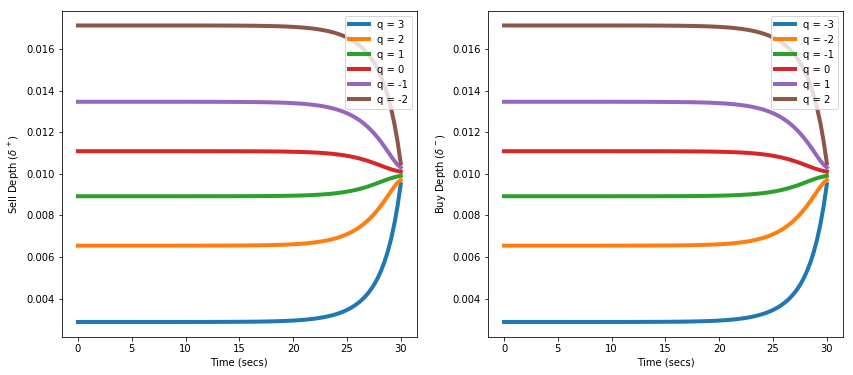

In [7]:
del_plus = np.zeros(((n-1), len(ts)))

f, (ax0, ax1) = plt.subplots(1,2,figsize=(14,6))

q_map = dict( (q, i) for i, q in enumerate(range(q_max, q_min-1, -1)))

lookup = lambda q : q_map[q] 

ax0.set_ylabel("Sell Depth ($\delta^+$)")
ax0.set_xlabel("Time (secs)")
ax1.set_ylabel("Buy Depth ($\delta^-$)")
ax1.set_xlabel("Time (secs)")

for q in range(q_max, q_min, -1):
    del_plus[lookup(q)] = ( G[lookup(q)] - G[lookup(q-1)] ) + ( 1. / kappa )
    ax0.plot(ts, del_plus[lookup(q)], label = 'q = %s' %q, lw='4')
    
for q in range(q_min, q_max ):
    del_plus[lookup(q)-1] = ( G[lookup(q)] - G[lookup(q+1)] ) + ( 1. / kappa )
    ax1.plot(ts, del_plus[lookup(q)-1], label = 'q = %s' %q, lw='4')    
    
ax0.legend()
ax1.legend()

plt.show()

#### Finite Difference Solutions to the HJB Equation

We have seen in the above the special case of the HJB equation with analytic formula. The next thing is to devise a numerical solution using finite difference to compute solutions for which there is no restriction to the values of $\kappa^+=\kappa^-=\kappa$.

Recall once again that we're trying to solve the ODE, 

$$
\begin{aligned}
\frac{\partial g}{\partial t}(t,q) &- \phi q^2 +\frac{\lambda^+}{e \kappa^+}e^{\kappa^+ \left[g(t, q- 1) - g(t, q)\right]}+\frac{\lambda^-}{e \kappa^-}e^{\kappa^- \left[g(t, q+ 1) - g(t, q)\right]}=0\\
g(T, q) &= -\alpha q^2
\end{aligned}
$$

To implement a finite difference solution, we define, 

 - time steps $t_0 = 0, t_1 = \Delta t, t_2 = 2\Delta t, \ldots, t_M=M\Delta t = T$
 
And we write a numerical approximation for $g$ as, 

$$
g(t_m, q) \approx g(m\Delta t, q) = g^m_q
$$

Using backward differencing, we have, 

$$
\frac{\partial g}{\partial t}(m\Delta t, q) = \frac{g(m\Delta t, q)-g((m-1)\Delta t, q)}{\Delta t} + \mathcal{O}(\Delta t)
$$

Substituting into the ODE gives, 

$$
\begin{aligned}
\frac{g^{m}_q-g^{m-1}_q}{\Delta t} - \phi q^2 +\frac{\lambda^+}{e \kappa^+}e^{\kappa^+ \left[g^m_{q-1} - g^m_q\right]}+\frac{\lambda^-}{e \kappa^-}e^{\kappa^- \left[g^m_{q+1} - g^m_q\right]}=0\\
g^{m}_q-g^{m-1}_q -  \phi q^2 \Delta t+\frac{\lambda^+}{e \kappa^+}e^{\kappa^+ \left[g^m_{q-1} - g^m_q\right]}\Delta t+\frac{\lambda^-}{e \kappa^-}e^{\kappa^- \left[g^m_{q+1} - g^m_q\right]}\Delta t=0\\
g^{m-1}_q =g^m_q -  \phi q^2 \Delta t+\underbrace{\frac{\lambda^+}{e \kappa^+}}_{C_1}e^{\kappa^+ \left[g^m_{q-1} - g^m_q\right]}\Delta t+\underbrace{\frac{\lambda^-}{e \kappa^-}}_{C_2}e^{\kappa^- \left[g^m_{q+1} - g^m_q\right]}\Delta t
\end{aligned}
$$

So we just need to solve the above from time $m\Delta t= T$ back to $t=0$, where the terminal condition is given by $g^M_q = -\alpha q^2$.

In [10]:
lamda = 1.0    # arrival rate
lamda_p = lamda_m = lamda
kappa = 100.0  # fill rate constant
kappa_p = kappa_m = kappa
phi = 0.0001   # running inventory penalty. try 0.001 to see -ve sell depth
alpha = 0.0001 # penalty for terminal liquidation.
T = 30.0       # terminal time.
M = 100
dt = T / M

C1 = lamda_p / (np.e * kappa_p)
C2 = lamda_m / (np.e * kappa_m)

q_max = 3      # max inventory level
q_min = -3     # min inventory level

n = q_max - q_min + 1 # size of our ODE system

# terminal conditions.
z = np.array([ -alpha * i**2 for i in range(q_max, q_min-1, -1)])

In [11]:
G = np.zeros((n, M+1))
G[:,-1] = z

In [12]:
for idx in range(M, 0, -1):

    gm_prev = np.zeros(n)
    gm = G[:,idx]
    for q in range(q_max, q_min-1, -1):
        if q == q_max:
            gm_prev[lookup(q)] = gm[lookup(q)] + (- (phi*q**2) 
                                                  + C1 * np.exp( kappa_p*( gm[lookup(q-1)]-gm[lookup(q)] ) ) ) * dt
        elif q == q_min:
            gm_prev[lookup(q)] = gm[lookup(q)] + (- (phi*q**2) 
                                                  + C2 * np.exp( kappa_m*( gm[lookup(q+1)]-gm[lookup(q)] ) ) ) * dt
        else:
            gm_prev[lookup(q)] = gm[lookup(q)] + (- (phi*q**2) 
                                  + C1 * np.exp(kappa_p*(gm[lookup(q-1)]-gm[lookup(q)])) 
                                  + C2 * np.exp(kappa_m*(gm[lookup(q+1)]-gm[lookup(q)])))*dt

    G[:,idx-1] = gm_prev
 

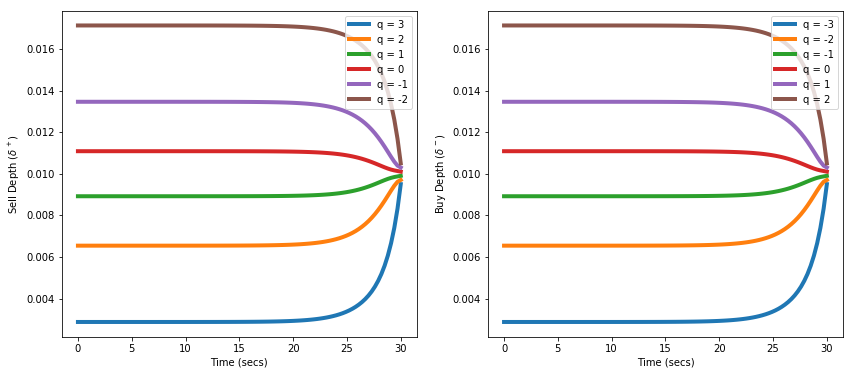

In [13]:
ts = np.linspace(0, T, M+1)

del_plus = np.zeros_like(G)

f, (ax0, ax1) = plt.subplots(1,2,figsize=(14,6))

ax0.set_ylabel("Sell Depth ($\delta^+$)")
ax0.set_xlabel("Time (secs)")
ax1.set_ylabel("Buy Depth ($\delta^-$)")
ax1.set_xlabel("Time (secs)")
    
for q in range(q_max, q_min, -1):
    del_plus[lookup(q)] = ( G[lookup(q)] - G[lookup(q-1)] ) + ( 1. / kappa )
    ax0.plot(ts, del_plus[lookup(q)], label = 'q = %s' %q, lw='4')
    
for q in range(q_min, q_max ):
    del_plus[lookup(q)-1] = ( G[lookup(q)] - G[lookup(q+1)] ) + ( 1. / kappa )
    ax1.plot(ts, del_plus[lookup(q)-1], label = 'q = %s' %q, lw='4')        
    
ax0.legend()
ax1.legend()

plt.show()

As we can see from the above, the finite difference solutions exactly matches that of the analytic solution with the same parameters.

We can next use the finite difference solution and choose different values for $\kappa^+$ and $\kappa^-$ to see how they affect the solutions.